In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from stock_pull import*

C:\Users\andre\Documents\Bootcamp\Class_repository\repository_work\Project_2_dream_team\stock_pull.py:11: UserWarning: Make sure you are in the PyViz environment
  warnings.warn('Make sure you are in the PyViz environment')
C:\Users\andre\Documents\Bootcamp\Class_repository\repository_work\Project_2_dream_team\stock_pull.py:23: UserWarning: Make sure your api keys are renamed to fit this function or alter the function to fit your names
  warnings.warn('Make sure your api keys are renamed to fit this function or alter the function to fit your names')


In [4]:
cleaned.head(12)

,SPY Open,SPY Close,SPY Volume
date,,,
2000-07-03,145.4375,147.2812,1436600.0
2000-07-05,146.3750,144.6250,2748200.0
2000-07-06,144.9375,145.7500,5963200.0
2000-07-07,146.6875,148.0937,3034800.0
2000-07-10,147.8750,147.8437,2816100.0
2000-07-11,147.4687,148.1562,5431600.0
2000-07-12,149.2812,149.1250,5883000.0
2000-07-13,149.9843,149.7812,5356000.0
2000-07-14,150.4375,151.2500,5341900.0


## Run the Contrarian Strategy

In [12]:
def strategy(cleaned):
    #Create a new dataframe of only the closing values
    df = cleaned.loc[:,[i for i in cleaned.columns if i.endswith('Close')]]

    #Rename the columns as only the ticker (just drop the word 'close')
    df.columns = df.columns.str.replace(' Close','')
    
    # Sort the date by ascending order so that the pct change function calculates properly
    df = df.sort_index(ascending=True)

    #Loop through the columns and create a percentage change column
    for col in df.columns:
        ticker = col

        df[f"{ticker} % Change"] = df[col].pct_change() * 100

    
    
#     init an entry signal as 0.0 to use as it loops over the data 
    df['Entry'] = 0.0
    df['Entry'] = np.where(df['SPY % Change'] <= -2.0, 1.0, 0.0)
    df['Exit'] = 0.0
    df['Exit'] = np.where(df['SPY % Change'] >= 2.0, 1.0, 0.0)
    df['Signal'] = df['Entry'] - df['Exit']
    return df


def backtest(strat):
    backtest_df = strat[['SPY', 'SPY % Change', 'Entry', 'Exit', 'Signal']].copy()
    bt = backtest_df
    current_pos = 0
    cash = 100000
    bt['Current Position'] = current_pos
    bt['Current Cash'] = cash
    for i, row in bt.iterrows():

        if bt.at[i, 'Signal'] == 1 and current_pos == 0:
            current_pos += 100
            cash = cash - (bt.at[i, 'SPY']*current_pos)
            bt.at[i, 'Current Position'] = current_pos
            bt.at[i, 'Current Cash'] = cash

        elif bt.at[i, 'Signal'] == 1 and current_pos == 100:
            current_pos = current_pos
            cash = cash
            bt.at[i, 'Current Position'] = current_pos
            bt.at[i, 'Current Cash'] = cash

        elif bt.at[i, 'Signal'] == -1 and current_pos != 0:
            current_pos = 0
            cash = cash + (bt.at[i, 'SPY']*100)
            bt.at[i, 'Current Position'] = current_pos
            bt.at[i, 'Current Cash'] = cash

        elif bt.at[i, 'Signal'] == -1 and current_pos == 0:
            current_pos = current_pos
            cash = cash
            bt.at[i, 'Current Position'] = current_pos
            bt.at[i, 'Current Cash'] = cash

        elif bt.at[i, 'Signal'] == 0 and current_pos != 0:
            current_pos = current_pos
            cash = cash
            bt.at[i, 'Current Position'] = current_pos
            bt.at[i, 'Current Cash'] = cash
        elif bt.at[i, 'Signal'] == 0 and current_pos == 0:
            current_pos = 0
            cash = cash
            bt.at[i, 'Current Position'] = current_pos
            bt.at[i, 'Current Cash'] = cash

    return backtest_df

strat = strategy(cleaned)
bt = backtest(strat)
bt.tail(25)

,SPY,SPY % Change,Entry,Exit,Signal,Current Position,Current Cash
date,,,,,,,
2020-06-01,305.55,0.404180,0.0,0.0,0.0,0,114258
2020-06-02,308.08,0.828015,0.0,0.0,0.0,0,114258
2020-06-03,312.18,1.330823,0.0,0.0,0.0,0,114258
2020-06-04,311.36,-0.262669,0.0,0.0,0.0,0,114258
2020-06-05,319.34,2.562950,0.0,1.0,-1.0,0,114258
2020-06-08,323.20,1.208743,0.0,0.0,0.0,0,114258
2020-06-09,320.79,-0.745668,0.0,0.0,0.0,0,114258
2020-06-10,319.00,-0.557997,0.0,0.0,0.0,0,114258
2020-06-11,300.61,-5.764890,1.0,0.0,1.0,100,84197


In [16]:
x_var_list = ['Signal']
bt[x_var_list].tail()

,Signal
date,
2020-06-29,0.0
2020-06-30,0.0
2020-07-01,0.0
2020-07-02,0.0
2020-07-06,0.0


## Construct the Dependent Variable

In [21]:
bt['Positive Return'] = np.where(bt['SPY % Change'] > 0, 1.0, 0.0)
bt.tail(20)

,SPY,SPY % Change,Entry,Exit,Signal,Current Position,Current Cash,Positive Return
date,,,,,,,,
2020-06-08,323.20,1.208743,0.0,0.0,0.0,0,114258,1.0
2020-06-09,320.79,-0.745668,0.0,0.0,0.0,0,114258,0.0
2020-06-10,319.00,-0.557997,0.0,0.0,0.0,0,114258,0.0
2020-06-11,300.61,-5.764890,1.0,0.0,1.0,100,84197,0.0
2020-06-12,304.21,1.197565,0.0,0.0,0.0,100,84197,1.0
2020-06-15,307.05,0.933566,0.0,0.0,0.0,100,84197,1.0
2020-06-16,312.96,1.924768,0.0,0.0,0.0,100,84197,1.0
2020-06-17,311.66,-0.415389,0.0,0.0,0.0,100,84197,0.0
2020-06-18,311.78,0.038503,0.0,0.0,0.0,100,84197,1.0


In [23]:
training_start = bt.index.min()
training_end = '2016-09-14'

testing_start =  '2016-09-15'
testing_end = bt.index.max()

print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2000-07-03 00:00:00
Training End: 2016-09-14
Testing Start: 2016-09-15
Testing End: 2020-07-06 00:00:00


In [24]:
X_train = bt[x_var_list][training_start:training_end]
y_train = bt['Positive Return'][training_start:training_end]

X_train.tail()

,Signal
date,
2016-09-08,0.0
2016-09-09,1.0
2016-09-12,0.0
2016-09-13,0.0
2016-09-14,0.0


In [25]:
y_train.tail()

date
2016-09-08    0.0
2016-09-09    0.0
2016-09-12    1.0
2016-09-13    0.0
2016-09-14    0.0
Name: Positive Return, dtype: float64

In [26]:
X_test = bt[x_var_list][testing_start:testing_end]
y_test = bt['Positive Return'][testing_start:testing_end]

X_test.tail()

,Signal
date,
2020-06-29,0.0
2020-06-30,0.0
2020-07-01,0.0
2020-07-02,0.0
2020-07-06,0.0


In [27]:
y_test.tail()

date
2020-06-29    1.0
2020-06-30    1.0
2020-07-01    1.0
2020-07-02    1.0
2020-07-06    1.0
Name: Positive Return, dtype: float64

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [48]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

Results = y_test.to_frame()
Results["Predicted Value"] = predictions
Results['Return'] = bt['SPY % Change']
Results.head()

,Positive Return,Predicted Value,Return
date,,,
2016-09-15,1.0,1.0,0.999296
2016-09-16,0.0,1.0,-0.887217
2016-09-19,1.0,1.0,0.018747
2016-09-20,1.0,1.0,0.004686
2016-09-21,1.0,1.0,1.124543


In [49]:
%matplotlib inline

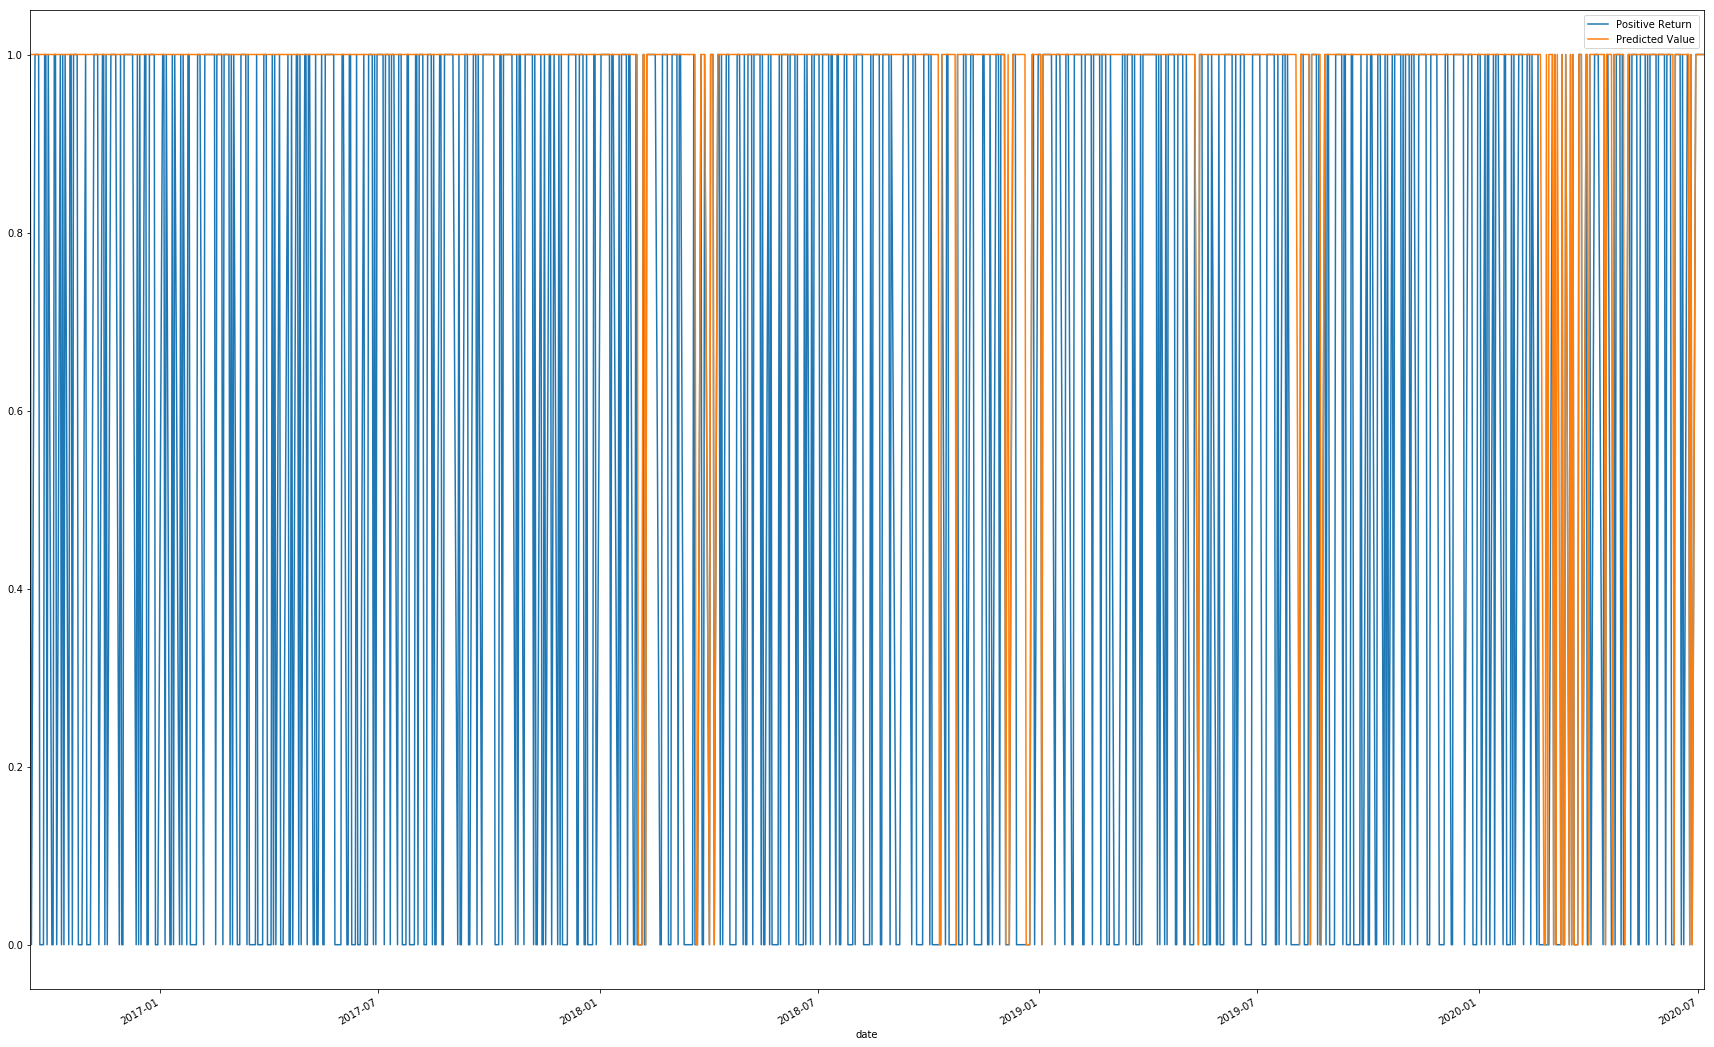

In [50]:
Results[['Positive Return', 'Predicted Value']].plot(figsize=(30,20))

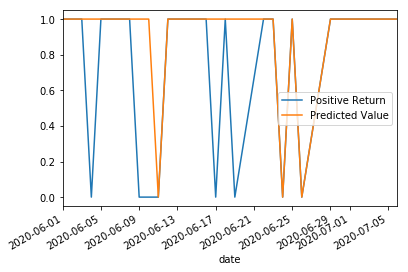

In [51]:
Results[['Positive Return', 'Predicted Value']].tail(25).plot()

In [56]:
Results['Predicted Value'].replace(0, -1, inplace=True)
Results.tail(50)

,Positive Return,Predicted Value,Return
date,,,
2020-04-24,1.0,1.0,1.393866
2020-04-27,1.0,1.0,1.441849
2020-04-28,0.0,1.0,-0.459850
2020-04-29,1.0,1.0,2.617856
2020-04-30,0.0,1.0,-0.931073
2020-05-01,0.0,-1.0,-2.647342
2020-05-04,1.0,1.0,0.275823
2020-05-05,1.0,1.0,0.923934
2020-05-06,0.0,1.0,-0.677871


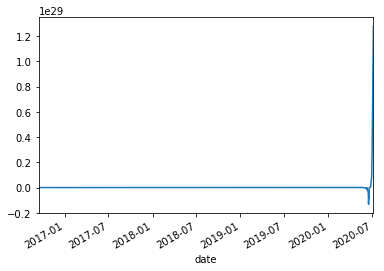

In [54]:
(1 + (Results['Return'] * Results['Predicted Value'])).cumprod().plot()

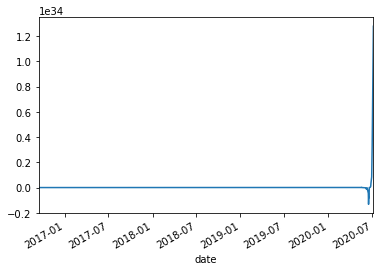

In [57]:
initial_capital = 100000

# Plot cumulative return of model in terms of capital
cumulative_return_capital = initial_capital * (1 + (Results['Return'] * Results['Predicted Value'])).cumprod()
cumulative_return_capital.plot()